In [4]:
from PIL import Image
import sympy
import math
import numpy as np
import matplotlib.pyplot as plt
import mpmath

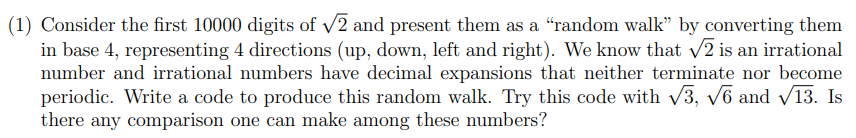

In [6]:
prob1 = Image.open('Problem1.png')
prob1

In [9]:
# Step 1: Calculate square root
def calculate_sqrt(number, digits=10000):
    mpmath.mp.dps = digits + 50
    sqrt_str = str(mpmath.sqrt(number))[2:digits+2]
    return sqrt_str

In [11]:
# Step 2: Convert the base-10 digits into base-4 digits
def convert_base_10_to_base_4(number_str):
    base_4_digits = []
    for digit in number_str:
        base_4_digits.append(int(digit) % 4) # Convert each decimal digit into a base-4 digit
    return base_4_digits

In [13]:
# Step 3: Generate random walk from base-4 digits
def random_walk(base_4_digits):
    x, y = 0, 0
    positions = [[x, y]]
    
    for digit in base_4_digits:
        if digit == 0:  # Up
            y += 1
        elif digit == 1:  # Down
            y -= 1
        elif digit == 2:  # Left
            x -= 1
        elif digit == 3:  # Right
            x += 1
        positions.append([x, y])
    
    return positions

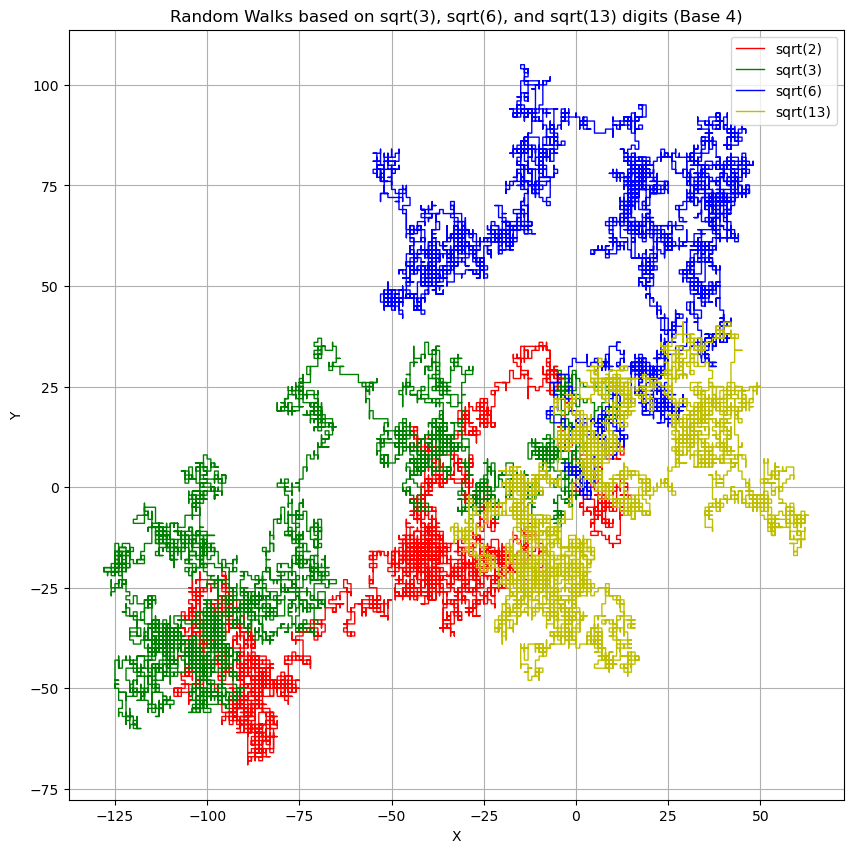

In [105]:
# Step 4: Plot the random walks for sqrt(3), sqrt(6), and sqrt(13)
numbers_to_plot = [2, 3, 6, 13]
colors = ['r', 'g', 'b', 'y']

plt.figure(figsize=(10, 10))

for i in range(4):
    number = numbers_to_plot[i]
    sqrt_digits = calculate_sqrt(number)
    base_4_digits = convert_base_10_to_base_4(sqrt_digits)
    positions = random_walk(base_4_digits)

    x_vals, y_vals = [], []
    for position in positions:
        x_vals.append(position[0])
        y_vals.append(position[1])
    plt.plot(x_vals, y_vals, lw=1, label=f"sqrt({number})", color=colors[i])

plt.title("Random Walks based on sqrt(3), sqrt(6), and sqrt(13) digits (Base 4)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()

### Comparison
- $\sqrt 2$ (red) and $\sqrt 3$ (green): While differing in spread, both move across the grid with less vertical movement compared to the others

- ​$\sqrt 6$ (blue): Evenly spread throughout the grid in both vertical and horizontal directions

- ​$\sqrt 13$ (yellow): While not as distributed as $\sqrt 2$ and $\sqrt 3$, it forms a large area around itself through frequent changes in directions

# Problem 2

### 1) Chapter 5:

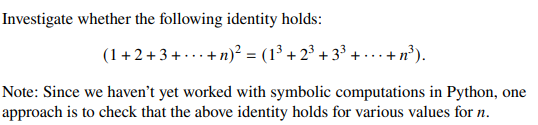

In [17]:
prob2_1 = Image.open('Problem2_1.png')
prob2_1

In [55]:
# Define identity(n)
def identity(n):
    left_side = (sum(range(1,n+1)))**2     #(1 + 2 + ... + n)^2
    right_side = 0
    for i in range(1, n + 1):
        right_side += i**3    # (1^3 + 2^3 + ... + n^3)

    return left_side == right_side

In [57]:
# Check the identity for several values of n
a = int(input("Enter a number: "))
for n in range(1, a + 1):  # Testing n from 1 to 20
    if identity(n):
        print(f"The identity holds for n = {n}.")
    else:
        print(f"The identity does NOT hold for n = {n}.")

Enter a number:  20


The identity holds for n = 1.
The identity holds for n = 2.
The identity holds for n = 3.
The identity holds for n = 4.
The identity holds for n = 5.
The identity holds for n = 6.
The identity holds for n = 7.
The identity holds for n = 8.
The identity holds for n = 9.
The identity holds for n = 10.
The identity holds for n = 11.
The identity holds for n = 12.
The identity holds for n = 13.
The identity holds for n = 14.
The identity holds for n = 15.
The identity holds for n = 16.
The identity holds for n = 17.
The identity holds for n = 18.
The identity holds for n = 19.
The identity holds for n = 20.


### 2) Chapter 6:

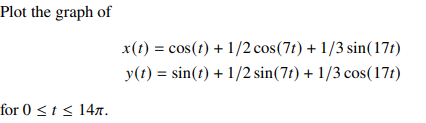

In [27]:
prob2_2 = Image.open('Problem2_2.png')
prob2_2

In [29]:
# Define the range for t from 0 to 14π
t = np.linspace(0, 14 * np.pi, 1000)

In [31]:
x_t = np.cos(t) + (1/2) * np.cos(7 * t) + (1/3) * np.sin(17 * t) # Define x(t)
y_t = np.sin(t) + (1/2) * np.sin(7 * t) + (1/3) * np.cos(17 * t) # Define y(t)

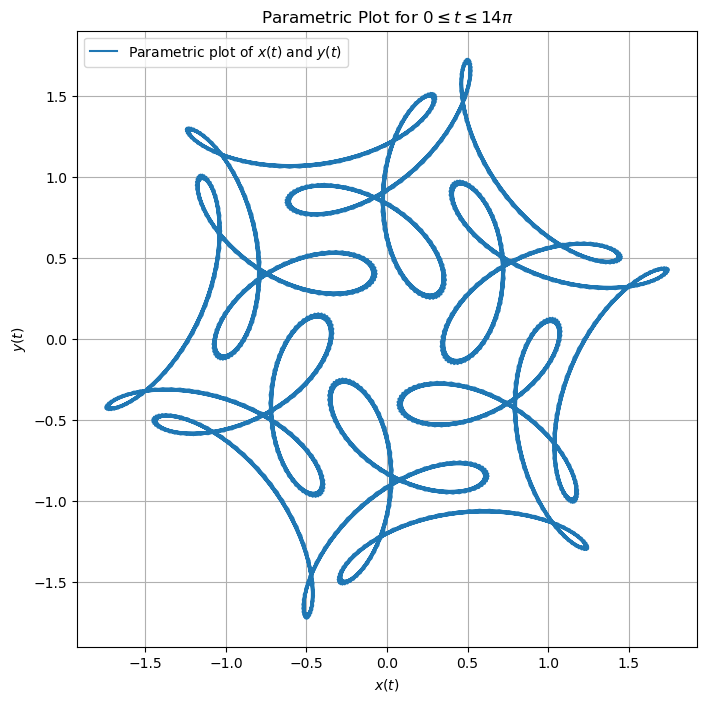

In [33]:
# Create the plot
plt.figure(figsize=(8, 8))
plt.plot(x_t, y_t, label=r'Parametric plot of $x(t)$ and $y(t)$')
plt.title(r"Parametric Plot for $0 \leq t \leq 14\pi$")
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$y(t)$')
plt.grid(True)
plt.legend()
plt.show()

### 3) Chapter 7:

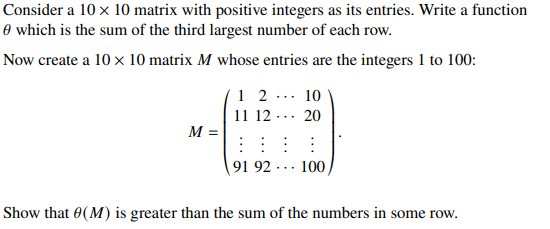

In [36]:
prob2_3 = Image.open('Problem2_3.png')
prob2_3

In [38]:
# Create the matrix M (10x10) with values from 1 to 100 row-wise
M = np.arange(1, 101).reshape(10, 10)
M

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
       [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
       [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
       [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
       [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]])

In [40]:
# Define the function theta(M) to compute the sum of the third largest element from each row
def theta(M):
    third_largest_sum = 0
    for row in M:
        sorted_row = sorted(row, reverse=True)
        third_largest_sum += sorted_row[2]  # Third largest element
    return third_largest_sum

In [42]:
# Compute theta(M)
theta_M = theta(M)

In [44]:
# Compute the sum of each row
row_sums = M.sum(axis=1)

theta_M, row_sums, np.any(theta_M > row_sums)  # Checking if theta(M) is greater than any row sum

(530, array([ 55, 155, 255, 355, 455, 555, 655, 755, 855, 955]), True)

### 4) Chapter 8:

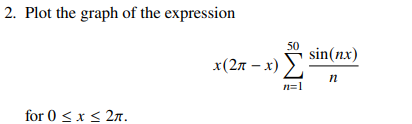

In [47]:
prob2_4 = Image.open('Problem2_4.png')
prob2_4

In [49]:
# Define the function to plot
def expression(x):
    # Part 1: Initialize an empty list to hold sine terms
    sin_terms = []
    
    # Part 2: Calculate each sine term and append it to the list
    for n in range(1, 51):
        sin_term = np.sin(n * x) / n
        sin_terms.append(sin_term)
    
    # Part 3: Sum all the sine terms
    sum_term = np.sum(sin_terms, axis=0)
    
    # Part 4: Calculate the quadratic term (x * (2 * np.pi - x))
    quadratic_term = x * (2 * np.pi - x)
    
    # Part 5: Multiply the quadratic term by the sum term
    result = quadratic_term * sum_term
    
    return result

In [51]:
# Generate x values from 0 to 2π
x_values = np.linspace(0, 2 * np.pi, 1000)

# Calculate y values
y_values = expression(x_values)

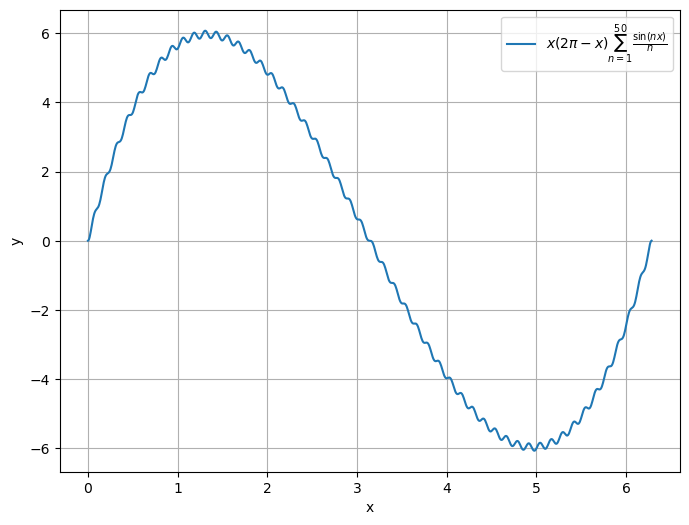

In [70]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=r"$x(2\pi - x) \sum_{n=1}^{50} \frac{\sin(nx)}{n}$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()